<a href="https://colab.research.google.com/github/Samuela31/Data-Mining-and-Analysis-Laboratory/blob/main/Data_Mining_Lab_CAT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
import pandas as pd

df=pd.read_csv("cat2.csv")
df

,Username,Tweet,Emotion
0,sam,Hi everyone,Positive
1,jai,I'm feeling a little down,Negative
2,kai,Today is my birthday!,Positive
3,ara,I broke my knee…,Negative
4,ally,I won a medal!,Positive
5,joe,It's dark….,Negative
6,sam,I ate cake yesterday,Positive
7,ara,Wish me luck,Positive
8,ally,I lost my money,Negative
9,ken,I'm scared of exams TT,Negative


In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis")

for index, row in df.iterrows():
    tweet = row[df.columns[1]]

    result = sentiment_analyzer(tweet)[0]
    sentiment_label = result['label']
    sentiment_score = result['score']

    df.at[index, 'Predicted sentiment'] = sentiment_label
    df.at[index, 'Sentiment score'] = sentiment_score

df

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Username,Tweet,Emotion,Predicted sentiment,Sentiment score
0,sam,Hi everyone,Positive,POSITIVE,0.999260
1,jai,I'm feeling a little down,Negative,NEGATIVE,0.999714
2,kai,Today is my birthday!,Positive,POSITIVE,0.999642
3,ara,I broke my knee…,Negative,NEGATIVE,0.985472
4,ally,I won a medal!,Positive,POSITIVE,0.999786
5,joe,It's dark….,Negative,NEGATIVE,0.997034
6,sam,I ate cake yesterday,Positive,POSITIVE,0.979501
7,ara,Wish me luck,Positive,POSITIVE,0.998501
8,ally,I lost my money,Negative,NEGATIVE,0.999729
9,ken,I'm scared of exams TT,Negative,NEGATIVE,0.997361


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Emotion']=le.fit_transform(df['Emotion'])
df['Predicted sentiment']=le.fit_transform(df['Predicted sentiment'])
df

,Username,Tweet,Emotion,Predicted sentiment,Sentiment score
0,sam,Hi everyone,1,1,0.999260
1,jai,I'm feeling a little down,0,0,0.999714
2,kai,Today is my birthday!,1,1,0.999642
3,ara,I broke my knee…,0,0,0.985472
4,ally,I won a medal!,1,1,0.999786
5,joe,It's dark….,0,0,0.997034
6,sam,I ate cake yesterday,1,1,0.979501
7,ara,Wish me luck,1,1,0.998501
8,ally,I lost my money,0,0,0.999729
9,ken,I'm scared of exams TT,0,0,0.997361


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

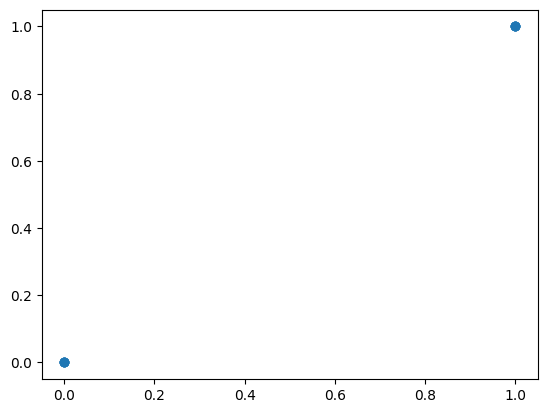

In [ ]:
plt.scatter(df['Emotion'],df['Predicted sentiment'])
plt.plot